<html>
    <body>
         <img src = "https://upload.wikimedia.org/wikipedia/commons/1/16/Driver_free_car.jpg" >
        <br/>
        <p>
We all know Self Driving Cars is one of the hottest areas of research and business for the tech giants. What seemed like a science-fiction, a few years ago, now seems more like  something which is soon to become a part and parcel of our regular life. Companies like Tesla, Nissan, Cadillac do have self-driving car assistance software, but, they still require a human to keep an eye on the road and take control when needed. However, it is fascinating to see how far we have come in terms of innovation and how fast technology is advancing. So much so, that now, with the help of basic deep learning, neural network magic, we can build our own pipeline for autonomous driving using Deep Learning Methodologies.</p>
        <pre>
<a id = "main"><b>Contents</b></a>
<a href = "#1"><b> - Import Packages</b></a>
<a href = "#2"><b> - Load the Training Data</b></a>
<a href = "#21"><b> - Distribution of Skewness values per column in the Dataset</b></a>
<a href = "#22"><b> - Distribution of Kurtosis values per row in the Dataset</b></a>
<a href = "#3"><b> - Create Sequential Model</b></a>
<a href = "#4"><b> - Serialize the Data</b></a>
<a href = "#5"><b> - Fit The Training Data</b></a>
<a href = "#6"><b> - Evaluating the Model Performance</b></a>
</pre>
    </body>
</html>

<b><a id = 1><pre>Import Packages</pre></a></b>

In [1]:
import numpy as np
from __future__ import division
import random
from keras.callbacks import History 
from keras.layers import Dense, Activation, Flatten, Conv2D, Lambda
from keras.layers import MaxPooling2D, Dropout, BatchNormalization
from keras.utils import print_summary
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import keras.backend as K
import pickle
import csv
import cv2
import os
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
from itertools import islice
import warnings
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import load_model
import keras.utils

#For Visualizations
from scipy.stats import norm, skew
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


<pre><b><a id = 2>Load the Training Data</b></a></pre>

In [2]:
print(os.listdir('../input/'))

['training', 'train-data']


In [3]:
features_directory = '../input/training/training data/Training Data/'
labels_file = '../input/train-data/train_Data.txt'

In [4]:
def image_preprocessing(img):
    resized_image = cv2.resize((cv2.cvtColor(img, cv2.COLOR_RGB2HSV))[:, :, 1], (100, 100))
    return resized_image

In [5]:
def Load_training():
    X = []
    y = []
    features = []

    with open(labels_file) as fp:
        for line in fp:
            X.append(features_directory + line.split()[0])
            y.append(float(line.split()[1]) * scipy.pi / 180)

    for i in range(len(X)):
        img = plt.imread(X[i])
        features.append(image_preprocessing(img))
    
    return features, y

In [6]:
features, labels = Load_training()

features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

with open("features", "wb") as f:
    pickle.dump(features, f, protocol=4)
with open("labels", "wb") as f:
    pickle.dump(labels, f, protocol=4)


In [7]:
features.shape

(15101, 100, 100)

In [8]:
labels.shape

(15101,)

<pre><b>I used Panel to convert the X and Y into Data Frames to perform 2-D Visualizations</pre></b>

In [9]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

pan = pd.Panel(features)
df = pan.swapaxes(1, 2).to_frame()
df.index = df.index.droplevel('major')
df.index = df.index+1

In [10]:
import gc
df.shape

(10000, 15101)

<pre><b><a id = 21>Distribution of Skewness values per column in the Dataset</b></a></pre>

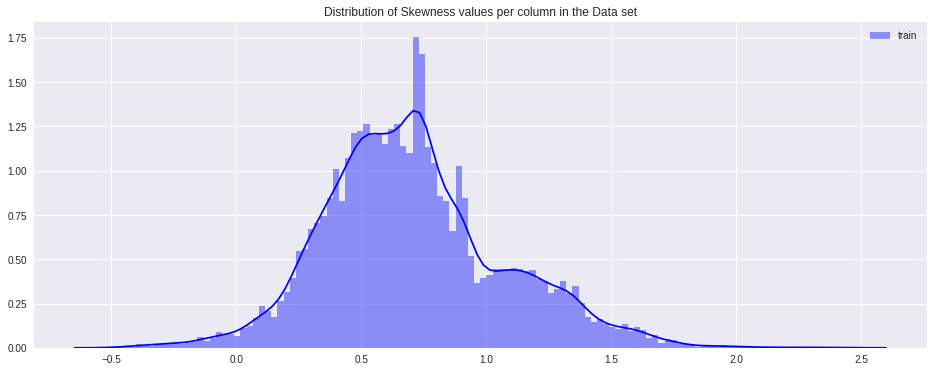

In [11]:
%matplotlib inline
plt.style.use('seaborn')

plt.figure(figsize=(16,6))
plt.title("Distribution of Skewness values per column in the Data set")
sns.distplot(df.skew(axis=0),color="blue", kde=True,bins=120, label='train')
plt.legend()
plt.show()

<pre><b><a id = 22>Distribution of Kurtosis values per row in the Dataset</b></a></pre>

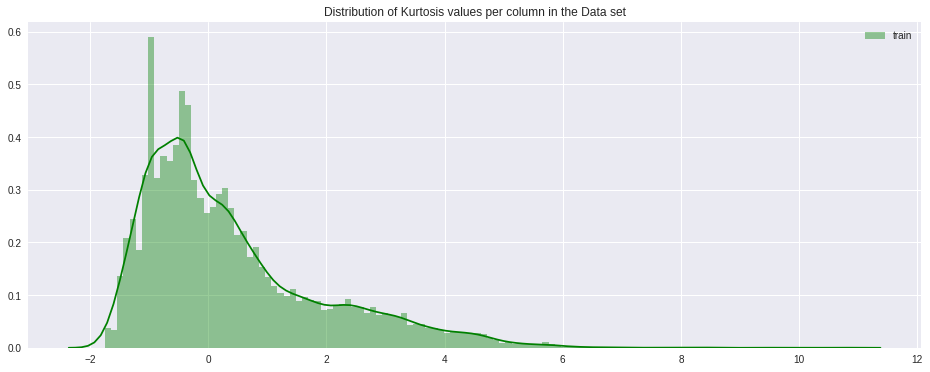

In [12]:
%matplotlib inline
plt.style.use('seaborn')

plt.figure(figsize=(16,6))
plt.title("Distribution of Kurtosis values per column in the Data set")
sns.distplot(df.kurtosis(axis=0),color="green", kde=True,bins=120, label='train')
plt.legend()
plt.show()

<pre><b><a id = 3>Create Sequential Model</b></a></pre>
<b><pre>Reference to the Orginal Paper <a href = "https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf" target="_blank">Click Here </a></pre></b>

In [13]:
def keras_model():
    
    model = Sequential()
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(100, 100, 1)))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(BatchNormalization())
    model.add(Dense(64))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(lr=0.0001), loss="mse")
    model.summary()
    return model

![](http://)<pre><b><a id = 4>Serialize and Augment the Data</b></a></pre>

In [14]:
def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))
    return features, labels

<pre><b><a id = 5>Fit The Training Data</b></a></pre>


In [15]:
warnings.filterwarnings('ignore')

features, labels = loadFromPickle()
features, labels = shuffle(features, labels)

#do a Train Test Split
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=42, test_size=0.20)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, random_state=42, test_size=0.10)

train_x = train_x.reshape(train_x.shape[0], 100, 100, 1)
val_x = val_x.reshape(val_x.shape[0], 100, 100, 1)

model = keras_model()
filepath = "./SelfDriving.h5"

es = EarlyStopping(monitor='val_loss', verbose=1)
checkpoint = ModelCheckpoint(filepath, verbose=1,monitor='val_loss', save_best_only=True)
hist = History()
callbacks_list = [es,checkpoint,hist]
    
model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10, batch_size=32,callbacks=callbacks_list)

print_summary(model)

model.save(filepath)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
activation_2 (Activat

<pre><b><a id = 6>Evaluating the Model Performance</b></a></pre>

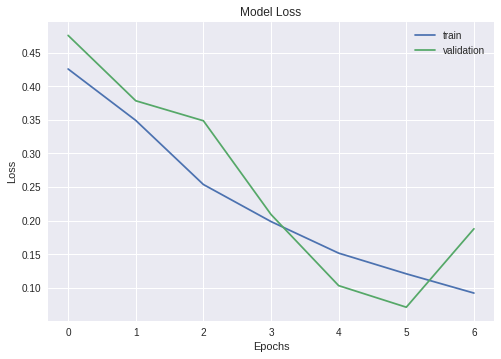

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()